In [1]:
from tensorflow import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pickle


f2 = open('data/split_0.80_0.10_0.10_aug_to_5000_down_sample_True_instance1/val_data', 'rb')
X_sequence_val, X_feature_val, X_image_val, Y_val = pickle.load(f2)
f2.close()
f3 = open('data/split_0.80_0.10_0.10_aug_to_5000_down_sample_True_instance1/test_data', 'rb')
X_sequence_test, X_feature_test, X_image_test, Y_test = pickle.load(f3)
f3.close()
from keras.preprocessing.sequence import pad_sequences
X_sequence_test_paded = pad_sequences(X_sequence_test, dtype='float', padding='post', value = np.nan)
X_sequence_val_paded = pad_sequences(X_sequence_val, dtype='float', padding='post', value = np.nan)
from util import preprocess
X_sequence_test_trimed = preprocess(X_sequence_test_paded)
X_sequence_val_trimed = preprocess(X_sequence_val_paded)

def build_channel(data):
    X = []
    for image in data:
        X.append(image.reshape(128, 128, 1))
    return X
X_image_test = np.array(build_channel(X_image_test))
X_image_val = np.array(build_channel(X_image_val))
X_feature_test = np.array(X_feature_test)
X_feature_val = np.array(X_feature_val)
Y_test = np.array(Y_test)-1
Y_val = np.array(Y_val)-1

In [2]:
models = []
for i in range(0,10):
    lodaed_model = keras.models.load_model('models/bagging/rnn_with_feature%d/model_5'%i)
    models.append(lodaed_model)

2022-10-14 13:41:14.600832: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-14 13:41:15.511966: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22245 MB memory:  -> device: 0, name: GeForce RTX 3090, pci bus id: 0000:73:00.0, compute capability: 8.6
2022-10-14 13:41:15.512917: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22300 MB memory:  -> device: 1, name: GeForce RTX 3090, pci bus id: 0000:d5:00.0, compute capability: 8.6
2022-10-14 13:41:17.529658: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs 

2022-10-14 12:54:48.084578: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-14 12:54:50.431652: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-10-14 12:54:50.607651: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8401
Could not load symbol cublasGetSmCountTarget from libcublas.so.11. Error: /home/zhkang/softwares/anaconda3/envs/DL/lib/python3.9/site-packages/tensorflow/python/../../../../libcublas.so.11: undefined symbol: cublasGetSmCountTarget


(11, 11)
Normalized confusion matrix
[[7.89351852e-01 0.00000000e+00 6.94444444e-03 1.36574074e-01
  2.31481481e-03 0.00000000e+00 1.62037037e-02 0.00000000e+00
  0.00000000e+00 4.39814815e-02 4.62962963e-03]
 [2.66666667e-03 8.05333333e-01 1.60000000e-01 0.00000000e+00
  8.00000000e-03 0.00000000e+00 1.06666667e-02 0.00000000e+00
  1.33333333e-02 0.00000000e+00 0.00000000e+00]
 [4.00000000e-02 1.00000000e-01 8.00000000e-01 4.00000000e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.00000000e-02 0.00000000e+00]
 [1.76470588e-01 0.00000000e+00 0.00000000e+00 8.23529412e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.31914894e-04 5.31914894e-04 5.31914894e-04 0.00000000e+00
  7.32978723e-01 6.11702128e-02 1.97872340e-01 5.31914894e-04
  0.00000000e+00 5.31914894e-04 5.31914894e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.88888889e-02 9.68888889e-01 2.2222222

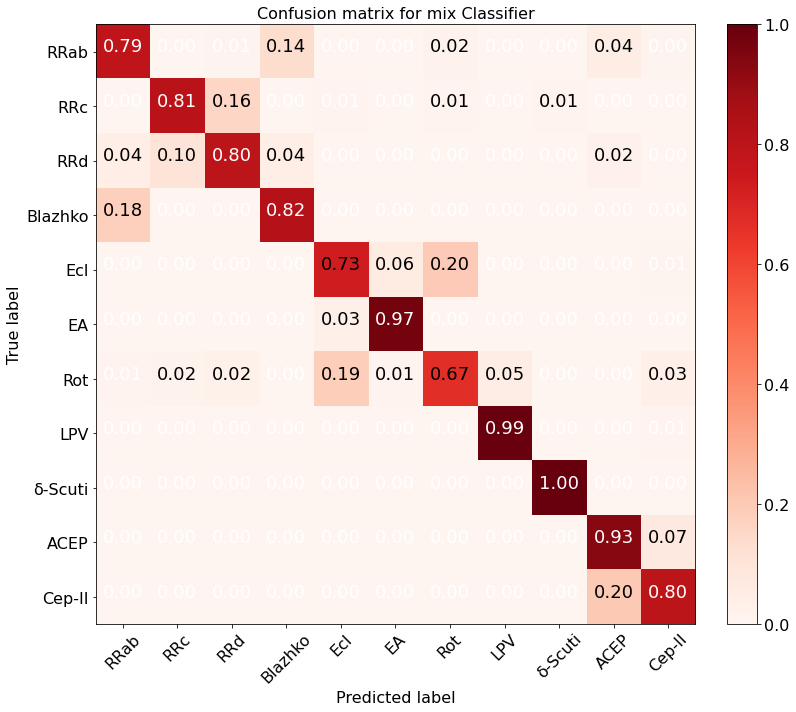

In [3]:

def generate_batch(X_sequence, X_image,  X_feature, Y, batch_size):
    idx = 0
    batch_num = len(Y)/batch_size
    while idx < batch_num:
        batch_x_sequence = X_sequence[idx * batch_size : (idx + 1) * batch_size]
        batch_x_image = X_image[idx * batch_size : (idx + 1) * batch_size]
        batch_x_feature = X_feature[idx * batch_size : (idx + 1) * batch_size]
        batch_y = Y[idx * batch_size : (idx + 1) * batch_size]
        yield batch_x_sequence, batch_x_image, batch_x_feature, batch_y
        idx += 1

# test_gen = generate_batch(X_sequence_test_trimed, X_image_test, X_feature_test, Y_test, 128)      
# y_label = Y_test

val_gen = generate_batch(X_sequence_val_trimed, X_image_val, X_feature_val, Y_val, 128)      
y_label = Y_val


y_predict = np.array([])
for x_sequence, x_image, x_feature, y in val_gen:
    results = []
    for model in models:
        results.append(model.predict({'sequence':x_sequence, 
                                        # 'image':x_image,
                                        'feature':x_feature}))
    average_result = np.sum(results, axis=0)
    y_predict = np.concatenate([y_predict, np.argmax(average_result, axis=-1)])
y_label = y_label.astype(np.int32) 
y_predict = y_predict.astype(np.int32) 
cm = confusion_matrix(y_true=y_label, y_pred=y_predict, normalize='true')
print(cm.shape)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(values_format='.2g')

classes = ['RRab', 'RRc','RRd', 'Blazhko','Ecl', 'EA' , 'Rot', 'LPV','δ-Scuti','ACEP', 'Cep-II']

from util import cm_plot

plotting = cm_plot(cm, classes_types=classes, classifier_model='mix Classifier', nClasses=12,
                    cmap=plt.cm.Blues)